# 코로나 시각화

### 교회와 연관성 ?


참고

http://data.seoul.go.kr/dataList/OA-20279/S/1/datasetView.do

In [2]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt 
import seaborn as sns

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
# OPEN API
key = json.load(open('secrets.json'))['Key']['Seoul']
start = 0
end = 5

URL = f"http://openapi.seoul.go.kr:8088/{key}/json/Corona19Status/{start}/{end}"
data = requests.get(URL).json()
p_lst = data['Corona19Status']['row']
df = pd.DataFrame(p_lst)
df

,CORONA19_ID,CORONA19_DATE,CORONA19_NO,CORONA19_COUNTRY,CORONA19_PERSONAL,CORONA19_AREA,CORONA19_TRAVEL_HISTORY,CORONA19_CONTACT_HISTORY,CORONA19_CORRECTIVE,CORONA19_LEAVE_STATUS,CORONA19_MOVING_PATH,CORONA19_IDATE,CORONA19_MDATE
0,3686,8.29.,19632,,,송파구,,기타 확진자 접촉,,,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18
1,3687,8.29.,,,,관악구,,확인 중,,,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18
2,3688,8.29.,19567,,,관악구,,확인 중,,,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18
3,3689,8.29.,19445,,,양천구,,동작구 소재 서울신학교,,,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18
4,1,1.24.,#2,,,강서구,중국 우한시,해외 접촉,,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11


In [4]:
# data sheet
df = pd.read_csv('../input/서울시 코로나19 확진자 현황.csv', engine='python')
df

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,3961,8.31.,18223,NaN,NaN,기타,NaN,동작구 카드발급 업체 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
1,3960,8.31.,18896,NaN,NaN,기타,NaN,동작구 카드발급 업체 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
2,3959,8.31.,미부여,NaN,NaN,도봉구,NaN,도봉구 체육시설 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
3,3958,8.31.,20163,NaN,NaN,양천구,NaN,확인 중,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
4,3957,8.31.,20141,NaN,NaN,은평구,NaN,확인 중,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,5,1.31.,#9,NaN,NaN,성북구,NaN,#5 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y
3957,4,1.30.,#7,NaN,NaN,마포구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y
3958,3,1.30.,#6,NaN,NaN,종로구,NaN,#3 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y
3959,2,1.30.,#5,NaN,NaN,중랑구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      3961 non-null   int64  
 1   확진일     3961 non-null   object 
 2   환자번호    3955 non-null   object 
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      3961 non-null   object 
 6   여행력     392 non-null    object 
 7   접촉력     3961 non-null   object 
 8   조치사항    0 non-null      float64
 9   상태      2024 non-null   object 
 10  이동경로    3710 non-null   object 
 11  등록일     3961 non-null   object 
 12  수정일     3961 non-null   object 
 13  노출여부    3961 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 433.4+ KB


In [6]:
df.columns

Index(['연번', '확진일', '환자번호', '국적', '환자정보', '지역', '여행력', '접촉력', '조치사항', '상태',
       '이동경로', '등록일', '수정일', '노출여부'],
      dtype='object')

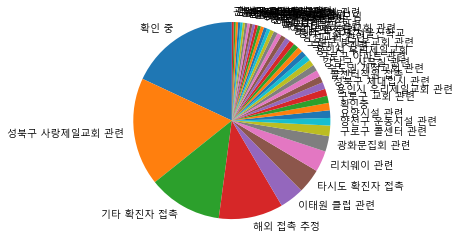

In [36]:
# 10개 이상 만
contact = df['접촉력'].value_counts()
contact_10 = contact[contact > 10]

plt.pie(contact_10, labels=contact_10.index, startangle=90,)
plt.axis('equal')
plt.show()

In [142]:
contact = df['접촉력'].value_counts()
church = []
for i in contact.index:
    if '교회' in i:
        church.append(i)
church

['성북구 사랑제일교회 관련',
 '구로구 교회 관련',
 '용인시 우리제일교회 관련',
 '수도권 개척교회 관련',
 '용인시 우리제일교회',
 '노원구 빛가온교회 관련',
 '왕성교회 관련',
 '여의도 순복음교회 관련',
 '순복음 강북교회',
 '송파구 교회관련',
 '영등포구 권능교회',
 '고양시 반석교회 관련(케네디상가)',
 '한국대학생선교회 관련',
 '강남구 동인교회 관련',
 '양천구 되새김교회 관련',
 '양천구 되새김 교회',
 '선교회 소모임',
 '노원구 교회 관련',
 '대전 꿈꾸는 교회',
 '명성교회 관련',
 '고양시 반석교회(케네디상가) 관련',
 '고양시 반석교회(케네디상가)',
 '양천구 되새김교회',
 '대구 방문(명성교회)',
 '신천지대구교회 관련',
 '고양시 반석교회 관련 (케네디상가)',
 '영등포구 권능교회 관련',
 '성북구 사랑제일교회']

In [92]:
church_peoples = df[df['접촉력'].isin(church)]
church_peoples

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
6,3955,8.31.,미부여,NaN,NaN,강북구,NaN,노원구 교회 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
12,3949,8.31.,20074,NaN,NaN,노원구,NaN,노원구 교회 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
13,3948,8.31.,20092,NaN,NaN,노원구,NaN,노원구 교회 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
17,3944,8.31.,20083,NaN,NaN,노원구,NaN,성북구 사랑제일교회 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
23,3938,8.31.,미부여,NaN,NaN,종로구,NaN,노원구 빛가온교회 관련,NaN,NaN,확인 중,2020-09-02 09:12:18,2020-09-02 09:12:18,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,353,3.25.,#9187,NaN,NaN,금천구,NaN,구로구 교회 관련,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:12,2020-09-02 09:12:12,Y
3889,72,2.27.,#2833,NaN,NaN,강동구,NaN,명성교회 관련,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y
3914,47,2.26.,#1247,NaN,NaN,강남구,NaN,신천지대구교회 관련,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y
3915,46,2.25.,#1246,NaN,NaN,경북,NaN,명성교회 관련,NaN,퇴원,이동경로 공개기간 경과,2020-09-02 09:12:11,2020-09-02 09:12:11,Y


In [39]:
# 서울 전체 감염자 중 교회 관련 비율 - 나중엔 그래프로 시각화
958 / 3961 * 100

24.18581166372128

In [104]:
sr = church_peoples['접촉력'].value_counts()
sr

성북구 사랑제일교회 관련          613
구로구 교회 관련               41
용인시 우리제일교회 관련           40
수도권 개척교회 관련             37
용인시 우리제일교회              33
노원구 빛가온교회 관련            31
왕성교회 관련                 30
여의도 순복음교회 관련            28
순복음 강북교회                19
송파구 교회관련                19
영등포구 권능교회               15
고양시 반석교회 관련(케네디상가)       9
한국대학생선교회 관련              7
강남구 동인교회 관련              6
양천구 되새김교회 관련             6
양천구 되새김 교회               5
선교회 소모임                  4
노원구 교회 관련                3
대전 꿈꾸는 교회                2
명성교회 관련                  2
고양시 반석교회(케네디상가) 관련       1
신천지대구교회 관련               1
고양시 반석교회 관련 (케네디상가)      1
양천구 되새김교회                1
성북구 사랑제일교회               1
영등포구 권능교회 관련             1
고양시 반석교회(케네디상가)          1
대구 방문(명성교회)              1
Name: 접촉력, dtype: int64

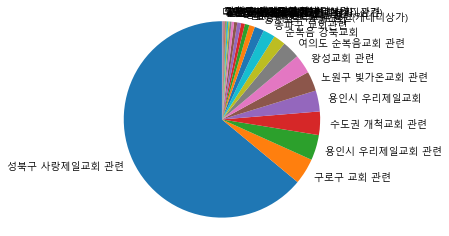

In [113]:
plt.pie(sr, labels=sr.index, startangle=90,)
plt.axis('equal')
plt.show()

In [ ]:
# 근데 이게 결국
# 감염자 중 교회 관련이 많다 라는 말 말고는 멀 나타내야 할지는 잘 모르겠음
